In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Latex, HTML, Math, display
from uncertainties import ufloat
from uncertainties.umath import sqrt
from uncertainties import unumpy as unp
from scipy.stats import linregress
from scipy.optimize import curve_fit
from uncertainties.umath import *

# Wechselstromwiderstände

## Induktivität und Kapazität

### Grundlegende Formeln
$ I = \frac{U_X}{|X|}   = \frac{U_R}{R} = \frac{U_{\mathrm{ges}}}{|Z_{\mathrm{ges}}|}$

$|X| = R \cdot \frac{U_X}{U_R}$


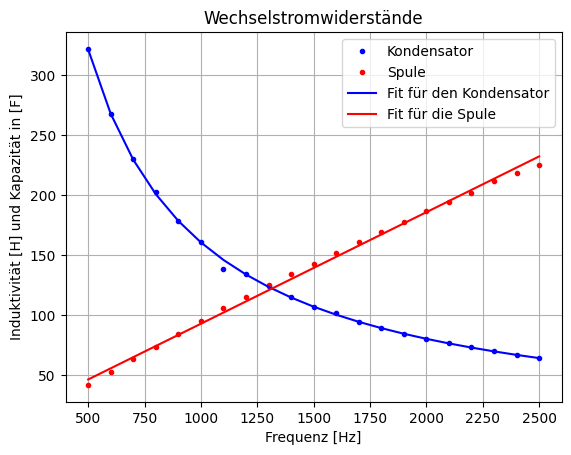

L   = 1.47725e-02 ± 7.16979e-05 H
C   = 9.91730e-07 ± 2.69673e-09 F
L = (14,77 ± 0,72) mH
C = (991,73 ± 0,27) nF


In [82]:
Unsicherheit_f = 1
Unsicherheit_U1 = 0.013
Unsicherheit_U3 = 0.006
f = unp.uarray([500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500], Unsicherheit_f)
Uc = unp.uarray([0.997, 0.985, 0.972, 0.957, 0.94, 0.922, 0.904, 0.884, 0.865, 0.845, 0.825, 0.805, 0.784, 0.764, 0.744, 0.725, 0.707, 0.688, 0.67, 0.653, 0.636], Unsicherheit_U1) #Effektivwerte
Ur1 = unp.uarray([0.08, 0.095, 0.109, 0.122, 0.136, 0.148, 0.169, 0.170, 0.180, 0.19, 0.199, 0.204, 0.214, 0.221, 0.227, 0.233, 0.238, 0.243, 0.247, 0.251, 0.255], Unsicherheit_U3) #Effektivwerte

Unsicherheit_U2 = 0.012
Unsicherheit_U4 = 0.006
Ul = unp.uarray([0.443, 0.519, 0.585, 0.641, 0.687, 0.726, 0.757, 0.782, 0.803, 0.821, 0.836, 0.848, 0.859, 0.867, 0.875, 0.881, 0.886, 0.89, 0.894, 0.897, 0.899], Unsicherheit_U2) #Effektivwerte
Ur2 = unp.uarray([0.273, 0.256, 0.239, 0.224, 0.21, 0.197, 0.185, 0.175, 0.166, 0.158, 0.151, 0.144, 0.138, 0.132, 0.127, 0.122, 0.118, 0.114, 0.109, 0.106, 0.103], Unsicherheit_U4) #Effektivwerte

R = ufloat(25.8,0.6)

Xc = R * (Uc/Ur1)

f_vals = unp.nominal_values(f)
Xc_vals = unp.nominal_values(Xc)
Xc_errs = unp.std_devs(Xc)


def Xc_model(f, Xc_vals): 
    return 1 / (2*np.pi * f_vals * Xc_vals)

popt, pcov = curve_fit(Xc_model, f_vals, Xc_vals)
C_fit = popt[0]
C_err = np.sqrt(pcov[0,0])


Xl = R * (Ul/Ur2)

Xl_vals = unp.nominal_values(Xl)
Xl_errs = unp.std_devs(Xl)

def Xl_model(f, Xl_vals):
    return  2*np.pi * f_vals * Xl_vals

popt, pcov = curve_fit(Xl_model, f_vals, Xl_vals)
L_fit = popt[0]
L_err = np.sqrt(pcov[0,0])


plt.figure()
plt.plot(f_vals, Xc_vals, 'o', markersize=3, label="Kondensator", color="blue") 
plt.plot(f_vals, Xl_vals, 'o', markersize=3, label="Spule", color="red") 
plt.plot(f_vals, Xc_model(f, C_fit), color="blue", markersize=2, label=rf"Fit für den Kondensator") # regressionsfunktion
plt.plot(f_vals, Xl_model(f, L_fit), color="red", markersize=2, label=rf"Fit für die Spule") # regressionsfunktion
plt.xlabel("Frequenz [Hz]")
plt.ylabel("Induktivität [H] und Kapazität in [F]")
plt.title("Wechselstromwiderstände")
plt.legend()
plt.grid(True)
plt.show()


print(f"L   = {L_fit:.5e} ± {L_err:.5e} H")
print(f"C   = {C_fit:.5e} ± {C_err:.5e} F")

print("L = (14,77 ± 0,72) mH")
print("C = (991,73 ± 0,27) nF")

## Schwingkreis

### Grundlegende Formeln
$ \frac {U_{C,0}(\omega)} {U_{0,0}} = \frac {(\omega_{0}^{2})} {(\sqrt{(\omega_0^{2}-\omega^{2})^{2} + 4\delta^{2}\omega^{2}})} $

ω0   = 8.26296e+03 ± 3.32844e+01  [rad/s]
δ    = 1.64088e+03 ± 3.26057e+01  [1/s]
Fit-Ergebnisse:
ω0   = (8263 ± 34) [rad/s]
δ    = (1641 ± 33) [1/s]


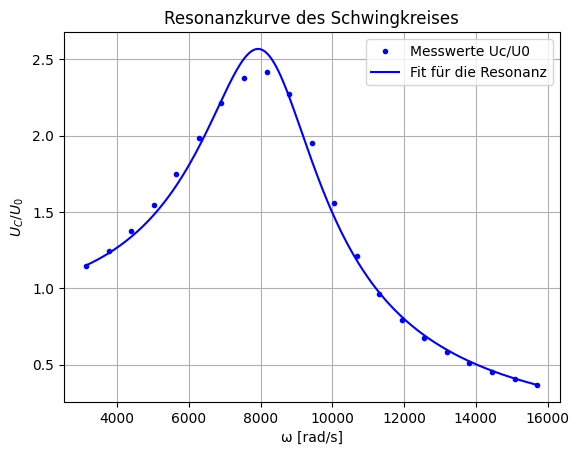

R = (4.84715+/-0.25516)e+01
Vergleich Widerstand
R_a = (48,5 ± 2.6) Ohm
R_g = (25,8 ± 0,6) Ohm


In [83]:
Unsicherheit_f = 1
f = unp.uarray([500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500], Unsicherheit_f)
omega = 2*np.pi*f
Unsicherheit_Spannung1= 0.018
Unsicherheit_Spannung2 = 0.014
Uc = unp.uarray([1.157, 1.219, 1.287, 1.352, 1.4, 1.421, 1.415, 1.376, 1.306, 1.206, 1.08, 0.941, 0.809, 0.698, 0.610, 0.538, 0.479, 0.430, 0.389, 0.354, 0.324], Unsicherheit_Spannung1) #Effektivwerte
U0 = unp.uarray([1.007, 0.978, 0.936, 0.875, 0.8, 0.716, 0.639, 0.578, 0.54, 0.53, 0.553, 0.603, 0.666, 0.723, 0.767, 0.8, 0.826, 0.845, 0.86, 0.872, 0.882], Unsicherheit_Spannung2) #Effektivwerte

Uc0 = Uc / U0

y = unp.nominal_values(Uc0)
y_err = unp.std_devs(Uc0)

omega_vals = unp.nominal_values(omega)


def resonance_model (omega, omega0, delta): 
    return (omega0**2) / (np.sqrt((omega0**2 - omega**2)**2 + (2*delta*omega)**2))
p0 = [100, 10]

popt, pcov = curve_fit(resonance_model, omega_vals, y, sigma = y_err, p0 = p0)
omega0_fit, delta_fit = popt
omega0_err, delta_err = np.sqrt(np.diag(pcov))


print(f"ω0   = {omega0_fit:.5e} ± {omega0_err:.5e}  [rad/s]")
print(f"δ    = {delta_fit:.5e} ± {delta_err:.5e}  [1/s]")

print("Fit-Ergebnisse:")
print(f"ω0   = (8263 ± 34) [rad/s]")
print(f"δ    = (1641 ± 33) [1/s]")

omega_plot = np.linspace(omega_vals.min(), omega_vals.max(), 400)

plt.figure()
plt.plot(omega_vals, y, 'o', markersize=3, label="Messwerte Uc/U0", color="blue") 
plt.plot(omega_plot, resonance_model(omega_plot, omega0_fit, delta_fit), color="blue", markersize=2, label=rf"Fit für die Resonanz") # regressionsfunktion
plt.xlabel("ω [rad/s]")
plt.ylabel("$U_C / U_0$")
plt.title("Resonanzkurve des Schwingkreises")
plt.legend()
plt.grid(True)
plt.show()

rho = ufloat(delta_fit, delta_err)
L = ufloat (0.01477,0.00072)
R = rho * 2 * L
print(f"R = {R:.5e}")

print("Vergleich Widerstand")
print(f"R_a = (48,5 ± 2.6) Ohm")
print(f"R_g = (25,8 ± 0,6) Ohm")
